<font color=#85C1E9 size=8>**Predictive Model**

<font color=#858FE9 size=4>**Machine learning-based Chagas disease diagnostic tool with proteomic profiles**
    
<font color=#9085E9 size=3>**Proyecto de grado para optar por el titulo de Quimica** 

<font color=#AD85E9 size=3>**Yenny Velandia**

<font color=#858FE1 size=6>**Samples resulting from filtration less than 3kDa**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA

<font color=#AD85E9 size=4>**Spectrum reading and Loading of Dataset**

In [2]:
import glob
fn = []
all_spectra = pd.DataFrame()

for f in glob.glob("./all spectra/*.txt"):
    df = pd.read_csv(f, header=None, delimiter=' ' )
    all_spectra = pd.concat([all_spectra, df], axis=1)
    fn.append(f) 
Datamz = all_spectra[0] # realciones m/z
Data = all_spectra[1] # Intensidades

<font color=#AD85E9 size=3>**Inspección**

In [3]:
Data.columns=range(Data.shape[1]) # Aquí le ponemos indices ordenados a las columnas de las intensidades
Data

Datamz.tail(10241) 

#everything has signals

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12799,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,...,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608,2862.608
12800,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,...,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851,2862.851
12801,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,...,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094,2863.094
12802,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,...,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337,2863.337
12803,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,...,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580,2863.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,...,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533
23036,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,...,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882
23037,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,...,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230
23038,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,...,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578


<font color=#AD85E9 size=3>**m/z**

In [4]:
Dsna=Datamz[0:23040]
Dsna

,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375,...,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375,598.375
1,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486,...,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486,598.486
2,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597,...,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597,598.597
3,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708,...,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708,598.708
4,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819,...,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819,598.819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,...,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533,5887.533
23036,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,...,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882,5887.882
23037,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,...,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230,5888.230
23038,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,...,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578,5888.578


In [5]:
D=Dsna.isnull().any()

In [6]:
df = D[D[0]==True]
df

Series([], dtype: bool)

<font color=#AD85E9 size=3>**Intensities**

In [7]:
Dataint=Data[0:23040]
Dataint

,0,1,2,3,4,5,6,7,8,9,...,226,227,228,229,230,231,232,233,234,235
0,267,234,776,823,872,1121,-6,92,923,451,...,768,163,763,383,172,166,1213,1290,202,157
1,381,415,896,879,999,1279,223,171,1018,546,...,910,183,815,464,316,331,1221,1390,202,166
2,588,535,994,939,1025,1440,422,323,1048,656,...,932,221,796,497,369,386,1228,1484,285,115
3,735,561,910,882,854,1322,626,469,818,636,...,784,196,743,340,316,325,1233,1571,146,173
4,803,432,814,856,548,1134,539,492,807,535,...,519,136,588,302,229,235,1236,1653,61,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,9,15,-5,11,-6,-6,2,12,-6,9,...,-2,7,3,5,11,11,12,4,13,7
23036,7,14,-2,14,0,23,-2,12,2,20,...,8,3,-1,0,9,8,12,4,14,12
23037,15,4,3,14,17,5,6,6,-12,19,...,5,11,1,5,-3,-2,13,5,17,14
23038,-1,1,-4,29,2,7,18,6,-1,10,...,8,-3,-6,11,-3,-3,13,5,31,1


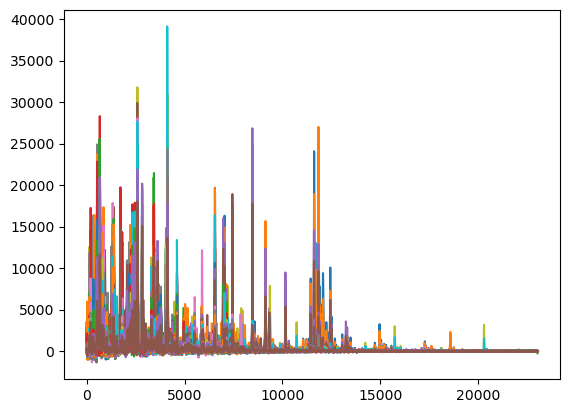

In [8]:
plt.plot(Dataint);

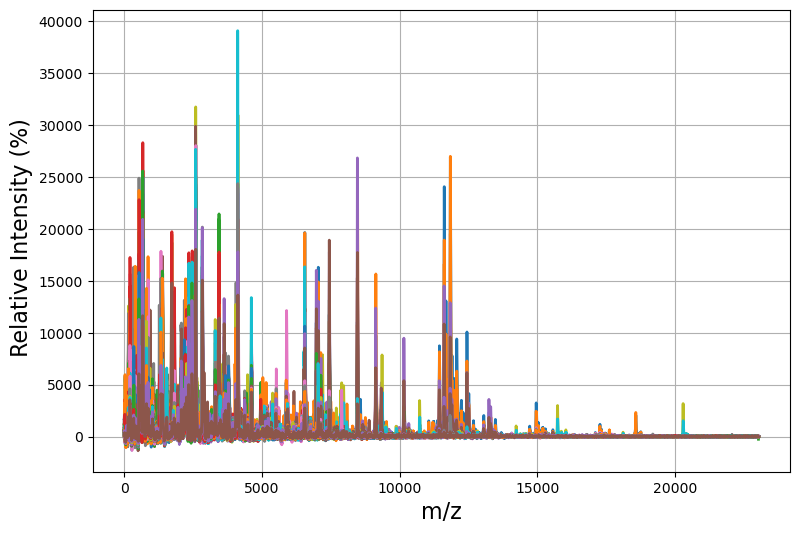

In [9]:
fig, ax = plt.subplots(figsize=(9,6))
plt.rcParams["font.family"] = 'Times New Roman'
ax.xaxis.grid()
ax.yaxis.grid()
ax.plot(Dataint, lw=2)
ax.set_xlabel('m/z',  fontsize=16)
ax.set_ylabel(' Relative Intensity (%)', fontsize=16)
plt.savefig('espectros de masas.png')
plt.show()

In [10]:
len(Dataint.columns)

236

In [11]:
C = pd.read_excel('clasificacion.xlsx')
C

,Number,clasification
0,0,A
1,1,A
2,2,N
3,3,N
4,4,S
...,...,...
231,231,A
232,232,N
233,233,N
234,234,S


In [12]:
Y= C[["clasification"]]
Y1=Y.set_axis(['Clase'], axis=1)
Y1

,Clase
0,A
1,A
2,N
3,N
4,S
...,...
231,A
232,N
233,N
234,S


<font color=#858FE1 size=6>**Principal Component Analysis (PCA)**
    
<font color=#AD85E9 size=3>**Unsupervised learning**

In [13]:
#data normalization
from sklearn.preprocessing import StandardScaler, Normalizer
scaler=StandardScaler()

scaler.fit(Dataint) # calculo la media para poder hacer la transformacion
x_scaled=scaler.transform(Dataint)# Ahora si, escalo los datos y los normalizo

In [14]:
valt=Dataint.T

valtn = preprocessing.normalize(valt, norm='l1')# Normaliza los datos
# Iniciamos el desarrollo del PCA en este caso con 10 componentes
pca=PCA(n_components=10) # Otra opción es hacer pca hasta obtener un mínimo explicado ej.: pca=PCA(.85)
pca1=pca.fit(x_scaled.T) # obtener los componentes principales
datos_pca=pca.transform(x_scaled.T) # convertimos nuestros datos con las nuevas dimensiones de PCA, scores



# Esta celda es para observar la varianza explicada con 5 componentes, se podría variar a los que se quisiese
print("shape of datos_pca", datos_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:10]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
datos_pca1 = pd.DataFrame(datos_pca) # Convierte los datos pca en un DataFrame
datos_pca1=pd.concat([datos_pca1, Y1] ,axis=1) # Se agrega la columna del tipo de muestra

shape of datos_pca (236, 10)
[0.28667401 0.11023705 0.08176251 0.07480978 0.06549369 0.0445296
 0.03904263 0.03676679 0.0232983  0.02065167]
suma: 0.7832660304912435


In [15]:
scores_df = pd.DataFrame(datos_pca, columns = [f"PC{i+1}" for i in range(datos_pca.shape[1])])
scores_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,29.410385,-23.123084,42.882846,-7.151239,-19.041101,-15.682061,24.079691,20.195042,-4.472688,-2.559648
1,-3.518009,-28.237275,27.074341,-9.170727,-13.748236,-16.431063,21.333748,4.153631,-9.482374,2.269693
2,34.556415,-21.604162,-32.645251,-15.742305,2.193066,-21.736073,-10.716340,2.518611,-9.435959,-12.286994
3,-26.753048,-27.426063,-27.410647,0.213840,-8.324547,-18.324358,-18.948339,22.685730,-12.135597,-15.714129
4,-24.098123,-16.630922,-40.284457,22.352345,-12.595149,-14.122553,12.858111,-13.102117,13.550599,16.333815


In [16]:
variancia_explicada = np.insert(expl, 0, 0)
variancia_acomulada = np.cumsum(np.round(variancia_explicada, decimals=3))
pc_df = pd.DataFrame([''] + [f"PC{i+1}" for i in range(datos_pca.shape[1])], columns =['PC'])
variancia_explicada_df = pd.DataFrame(variancia_explicada, columns=["Variancia Explicada"])
variancia_acomulada_df = pd.DataFrame(variancia_acomulada, columns=['Variancia Acomulada']
)
df_variancia_explicada = pd.concat([pc_df, variancia_explicada_df, variancia_acomulada_df], axis =1)
df_variancia_explicada 

,PC,Variancia Explicada,Variancia Acomulada
0,,0.000000,0.000
1,PC1,0.286674,0.287
2,PC2,0.110237,0.397
3,PC3,0.081763,0.479
4,PC4,0.074810,0.554
5,PC5,0.065494,0.619
6,PC6,0.044530,0.664
7,PC7,0.039043,0.703
8,PC8,0.036767,0.740
9,PC9,0.023298,0.763


<font color=#EF5DCC size=9>**Supervised Learning**

<font color=#AD85E9 size=6>**Support vector machine (SVM)**
    
<font color=#858FE1 size=3>**supervised learning**

<font color=E3B4F2 size=3>**Model 80:20**

In [17]:
#Aquí se convierten las variables en números ordinales A es 0, N es 1 y S es 2

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

encoder = OrdinalEncoder()
encoder.fit(Y1[['Clase']])
Y1_code = encoder.transform (Y1[['Clase']])
Y1_code = pd.DataFrame(Y1_code)
Y1_code

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,2.0
...,...
231,0.0
232,1.0
233,1.0
234,2.0


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV #permite realizar una búsqueda exhaustiva en un conjunto de parámetros especificados por el usuario para encontrar los mejores hiperparámetros del modelo.
from sklearn.metrics import accuracy_score #permite calcular la precisión de un modelo de clasificación

X_tr2, X_te2, y_tr2, y_te2 = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = 12, shuffle = True)

modelo2 = SVC(C = 40, kernel = 'rbf', random_state=200)
modelo2.fit(X_tr2, y_tr2)


SVC(C=40, random_state=200)

In [19]:
# Predictions

predicciones = modelo2.predict(X_te2)
predicciones

array([0., 0., 1., 1., 0., 2., 2., 2., 1., 2., 2., 0., 2., 1., 0., 1., 2.,
       0., 2., 0., 2., 2., 0., 2., 1., 2., 0., 1., 0., 1., 1., 2., 0., 2.,
       2., 0., 1., 2., 1., 1., 0., 2., 0., 2., 0., 2., 2., 0.])

In [20]:
# Accuracy of the model

accuracy = accuracy_score(y_true = y_te2, y_pred = predicciones, normalize = True)
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 95.83333333333334%


<font color=#AD85E9 size=3>**Metrics for the confusion matrix**
    

In [21]:
from sklearn.linear_model import LinearRegression

# Fit the model to the training data
clf = LinearRegression().fit(X_tr2, y_tr2)

# Print the weight coefficients
print(clf.coef_)

[ 0.00120067  0.00031122 -0.00112054 ... -0.00021265 -0.0003282
 -0.00058425]


In [22]:
def opt_svc(X, y, xt, rs):
    
    # Defining PLS and the number of components
    
    svc = SVC(C = 40, kernel = 'rbf', random_state=123)
    svc.fit(X, y)
    y_pred = svc.predict(x_test)
    
    # Metric calculation
    
    ex = accuracy_score(y_true = y_test, y_pred = y_pred, normalize = True)
        
    return (y_pred, ex)

In [23]:
# Testing with 30 components

exs = []
yps = []
rss = []
arr_rs = np.arange(1, 200)

for rs in arr_rs:
    x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rs, shuffle = True)
    y_pred, ex = opt_svc(x_train, y_train, x_test, rs)
    rss.append(rs)
    yps.append(y_pred)
    exs.append(ex)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rss[np.argmax(exs)], shuffle = True)

# Creación del modelo SVM 

svc1 = SVC(C = 40, kernel = 'rbf', random_state=123)
svc1.fit(x_train, y_train)
y_pred_svc = svc1.predict(x_test)
ex_svc = accuracy_score(y_true = y_test, y_pred = y_pred_svc, normalize = True)
ex_svc

1.0

In [26]:
pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
     --------- --------------------------- 71.7/282.6 kB 660.6 kB/s eta 0:00:01
     ------------------------------ ------- 225.3/282.6 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


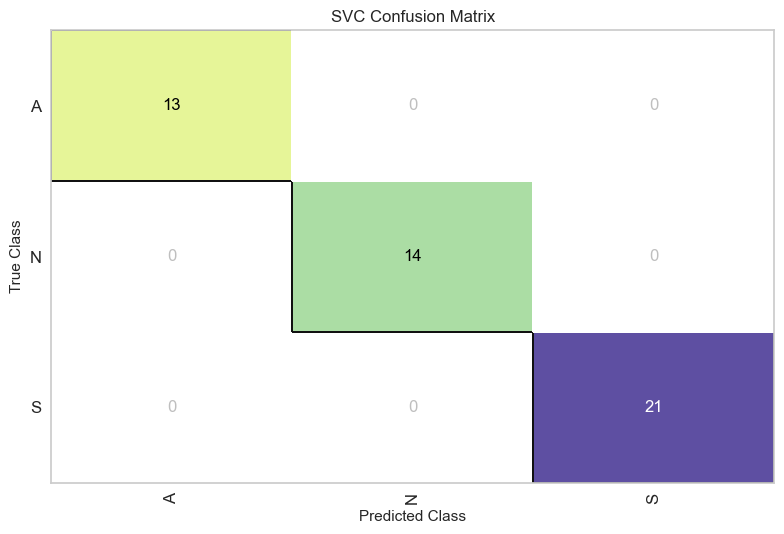

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        13
         1.0     1.0000    1.0000    1.0000        14
         2.0     1.0000    1.0000    1.0000        21

    accuracy                         1.0000        48
   macro avg     1.0000    1.0000    1.0000        48
weighted avg     1.0000    1.0000    1.0000        48



<Figure size 800x550 with 0 Axes>

In [27]:
from yellowbrick.classifier import confusion_matrix
from tabulate import tabulate as tabulate_fn

confusion_matrix(
    SVC(C = 40, kernel = 'rbf', random_state=123),
    x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'], cmap='Spectral'
) 

plt.savefig('CM_SVC.png');
plt.tight_layout();

from sklearn import metrics
print(metrics.classification_report(y_test,y_pred_svc, digits = 4))

In [28]:
np.max(exs), rss[np.argmax(exs)]

(1.0, 42)

<font color=#D63BB0 size=6>**Nu-Support Vector Classification (NuSVM)**

In [29]:
from sklearn.svm import NuSVC

X_tr2, X_te2, y_tr2, y_te2 = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size = 0.8, random_state = 12, shuffle = True)

modeloNu = NuSVC(nu=0.1, gamma='auto')
modeloNu.fit(X_tr2, y_tr2)

NuSVC(gamma='auto', nu=0.1)

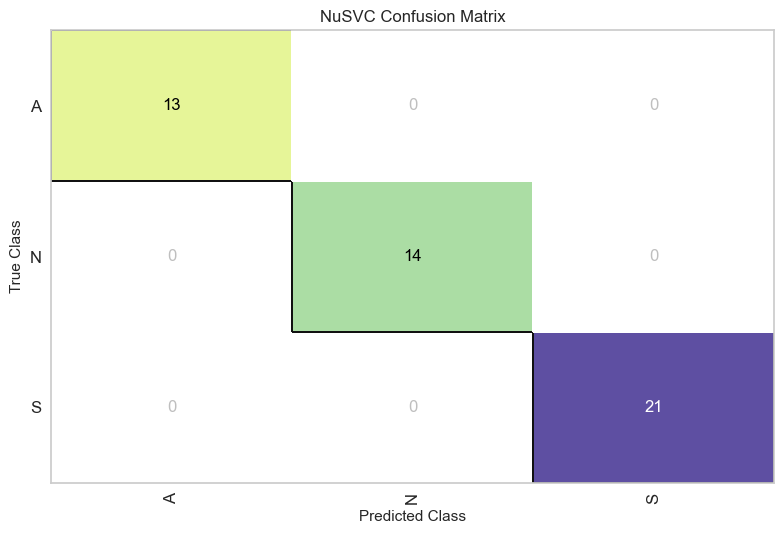

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        13
         1.0     1.0000    1.0000    1.0000        14
         2.0     1.0000    1.0000    1.0000        21

    accuracy                         1.0000        48
   macro avg     1.0000    1.0000    1.0000        48
weighted avg     1.0000    1.0000    1.0000        48



<Figure size 800x550 with 0 Axes>

In [30]:
from yellowbrick.classifier import confusion_matrix
confusion_matrix(
   NuSVC(nu=0.1, gamma='auto'),
    x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'], cmap='Spectral'
) 
plt.savefig('CM_NuSVC.png')
plt.tight_layout();

#Predicción con base a las variables ya entrenadas

y_predNu = modeloNu.predict(x_test)

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_predNu, digits = 4))


<font color=#D63BB0 size=6>**Linear Support Vector Classification**

In [66]:
from sklearn.svm import LinearSVC


x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size   = 0.8, random_state = rss[np.argmax(exs)], shuffle = True)

# Creación del modelo linearSVM 

LiSVC = LinearSVC()
LiSVC.fit(x_train, y_train)
#y_pred_svc = s
vc1.predict(x_test)
Lisvc = accuracy_score(y_true = y_test, y_pred = y_pred_svc, normalize = True)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [32]:
# Predictions
p = LiSVC.predict(x_test)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


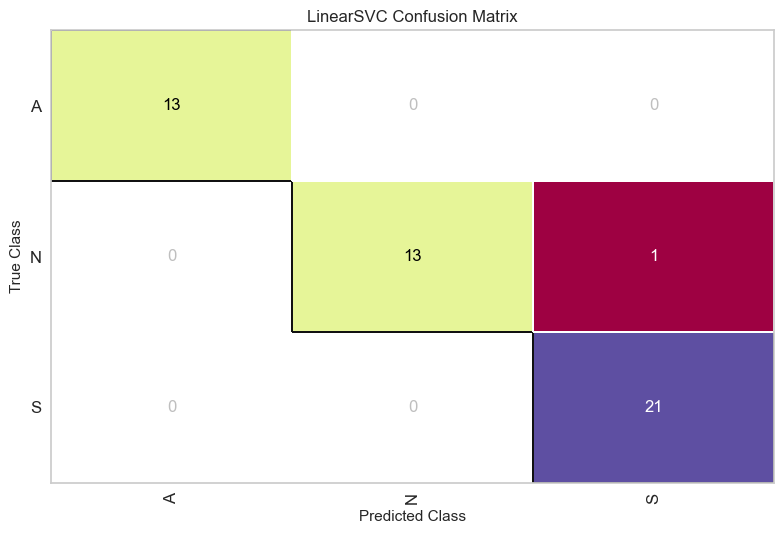

<Figure size 800x550 with 0 Axes>

In [33]:
from yellowbrick.classifier import confusion_matrix
confusion_matrix(
    LinearSVC (), x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'], cmap='Spectral'
) 
plt.savefig('CM_LinearSVC.png')
plt.tight_layout();

In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
confusion_matrix(y_test, p)

array([[13,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 21]], dtype=int64)

In [35]:
#Generación de soporte

print(metrics.classification_report(y_test, p, digits = 4))

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        13
         1.0     1.0000    0.9286    0.9630        14
         2.0     0.9545    1.0000    0.9767        21

    accuracy                         0.9792        48
   macro avg     0.9848    0.9762    0.9799        48
weighted avg     0.9801    0.9792    0.9790        48



<font color=#AD85E9 size=8>**Neural networks (Redes Neuronales)**



In [36]:
from sklearn.neural_network import MLPClassifier
x_train, x_test, y_train, y_test = train_test_split(x_scaled.T, Y1_code.values.ravel(), train_size=0.8, random_state=rss[np.argmax(exs)], shuffle= True)
ann = MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123)
ann.fit(X=x_train, y=y_train)

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

In [37]:
#Predicción con base a las variables ya entrenadas

y_pred = ann.predict(x_test)
score = ann.score(x_test, y_test)
score

0.8958333333333334

In [38]:
#Matriz de confusion para saber donde acierta y donde falla

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
confusion_matrix(y_test, y_pred)

array([[11,  2,  0],
       [ 1, 12,  1],
       [ 0,  1, 20]], dtype=int64)

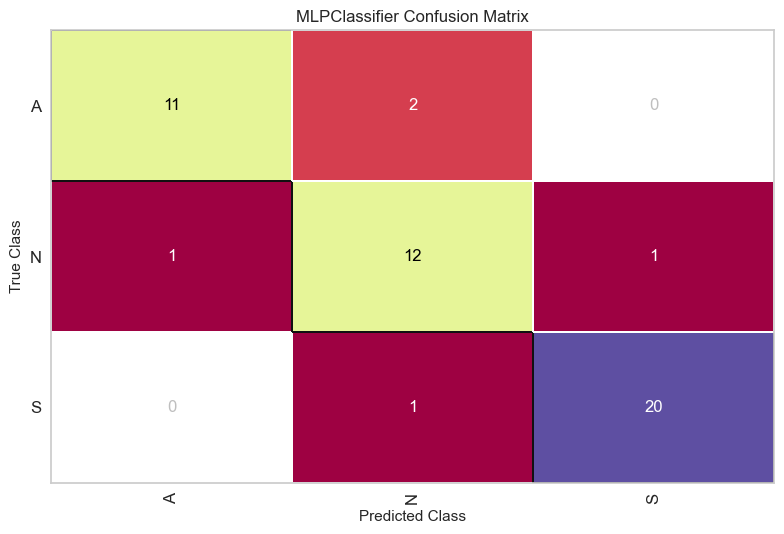

              precision    recall  f1-score   support

         0.0     0.9167    0.8462    0.8800        13
         1.0     0.8000    0.8571    0.8276        14
         2.0     0.9524    0.9524    0.9524        21

    accuracy                         0.8958        48
   macro avg     0.8897    0.8852    0.8867        48
weighted avg     0.8983    0.8958    0.8964        48



<Figure size 800x550 with 0 Axes>

In [39]:
from yellowbrick.classifier import confusion_matrix

confusion_matrix(
    MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter = 5000, random_state = 123),
    x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'], cmap='Spectral'
) 
plt.savefig('CM_MLPclassifier_neural networks.png')
plt.tight_layout();

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, digits = 4))

# SAVING THE MODELS

In [40]:
#Guardar el modelo entrenado. 
# Primero el SVC y segundo las redes Neuronales

import sklearn.externals
import joblib

File_svc = "Mod_chagas_svc.pkl"
joblib.dump(svc1, File_svc)


['Mod_chagas_svc.pkl']

In [41]:
File_ann = "Mod_chagas.pkl"
joblib.dump(ann, File_ann)

['Mod_chagas.pkl']

In [42]:
Model_svc =joblib.load('Mod_chagas.pkl')

In [43]:
Model_svc

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

In [44]:
Model_red = joblib.load('Mod_chagas_svc.pkl')
Model_red

SVC(C=40, random_state=123)

 <font color=#CF3BD6 size=8>**Classifiers**

 <font color=#E188CC size=6>**Random Forest**
    

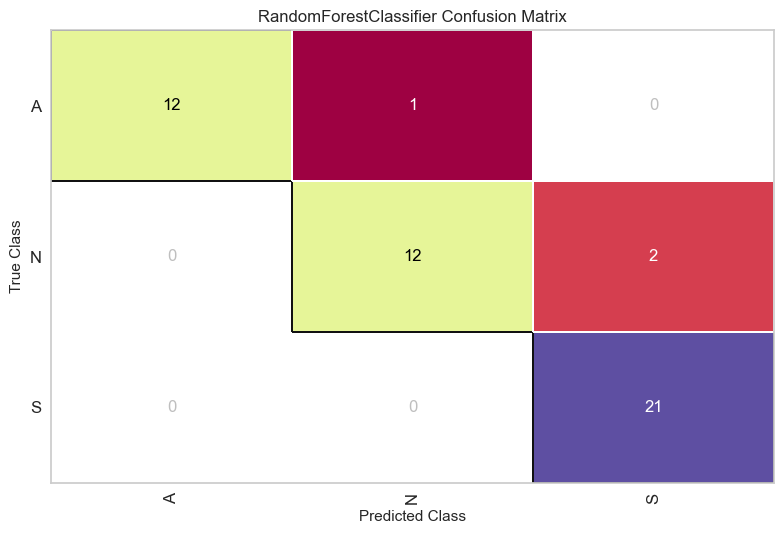

              precision    recall  f1-score   support

         0.0     1.0000    0.9231    0.9600        13
         1.0     0.9231    0.8571    0.8889        14
         2.0     0.9130    1.0000    0.9545        21

    accuracy                         0.9375        48
   macro avg     0.9454    0.9267    0.9345        48
weighted avg     0.9395    0.9375    0.9369        48



<Figure size 800x550 with 0 Axes>

In [45]:
from yellowbrick.classifier import confusion_matrix

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=90)
rfc.fit(x_train, y_train)

confusion_matrix(
   RandomForestClassifier(random_state = 90),
    x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'], cmap='Spectral'
) 

plt.savefig('CM_RandomForest.png')
plt.tight_layout();

#Predicción con base a las variables ya entrenadas

y_pred1 = rfc.predict(x_test)


#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred1, digits = 4))

 <font color=#E188CC size=6>**XG BOOST**

In [48]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=200)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
y_pred2 = xgb.predict(x_test)
score_xgb = xgb.score(x_test, y_test)
score_xgb

0.8958333333333334

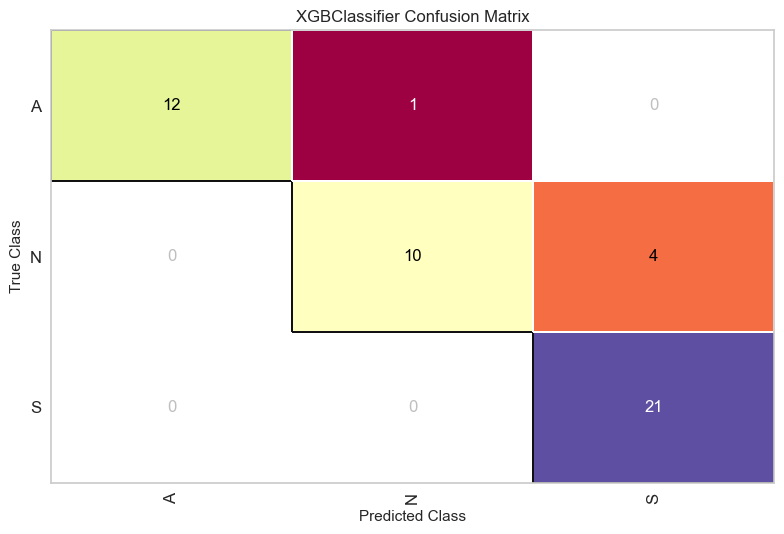

<Figure size 800x550 with 0 Axes>

              precision    recall  f1-score   support

         0.0     1.0000    0.9231    0.9600        13
         1.0     0.9091    0.7143    0.8000        14
         2.0     0.8400    1.0000    0.9130        21

    accuracy                         0.8958        48
   macro avg     0.9164    0.8791    0.8910        48
weighted avg     0.9035    0.8958    0.8928        48



In [50]:
from yellowbrick.classifier import confusion_matrix

visualizer = confusion_matrix(
    xgb
    , x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'],  cmap='Spectral'
   )
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)

plt.savefig('CM_XGB.png')
plt.tight_layout();
plt.show()

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred2, digits = 4))

 <font color=#973BD6 size=6>**Stochastic Gradient Descent-Classifier (SGDClassifier)**

In [51]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=100, tol=1e-3)
sgdc.fit(x_train, y_train)

y_pred_sgdc = sgdc.predict(x_test)
score_sgdc = sgdc.score(x_test, y_test)
score_sgdc

0.8333333333333334

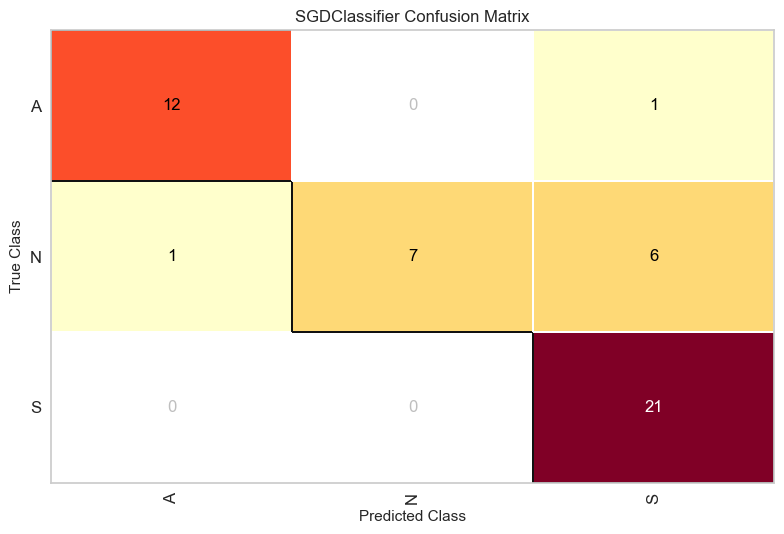

<Figure size 800x550 with 0 Axes>

              precision    recall  f1-score   support

         0.0     0.9231    0.9231    0.9231        13
         1.0     1.0000    0.5000    0.6667        14
         2.0     0.7500    1.0000    0.8571        21

    accuracy                         0.8333        48
   macro avg     0.8910    0.8077    0.8156        48
weighted avg     0.8698    0.8333    0.8194        48



In [52]:
from yellowbrick.classifier import confusion_matrix

visualizer = confusion_matrix(
    sgdc, x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'], #cmap='Spectral'
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)

plt.savefig('sdg.png')
plt.tight_layout();
plt.show()

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_sgdc, digits = 4))

 <font color=#E188CC size=6>**K-Nearest Neighbors(KNN)**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [54]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred3 = knc.predict(x_test)
score_knc = knc.score(x_test, y_test)
score_knc

0.8333333333333334

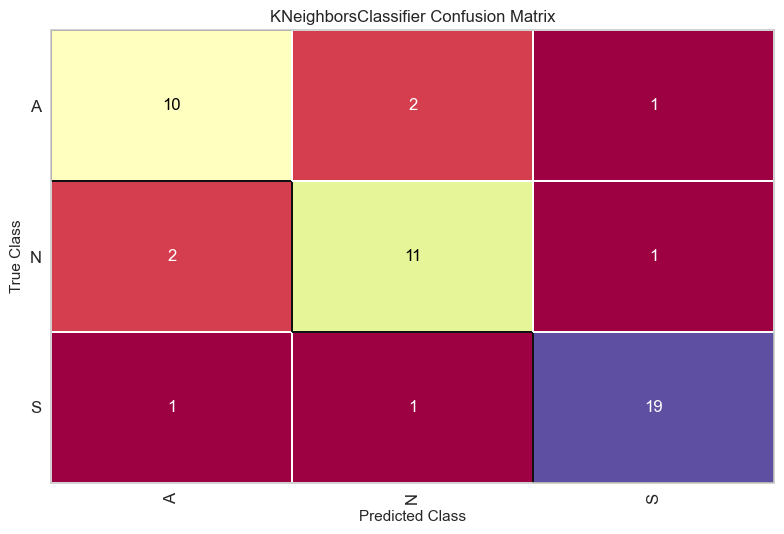

<Figure size 800x550 with 0 Axes>

              precision    recall  f1-score   support

         0.0     0.7692    0.7692    0.7692        13
         1.0     0.7857    0.7857    0.7857        14
         2.0     0.9048    0.9048    0.9048        21

    accuracy                         0.8333        48
   macro avg     0.8199    0.8199    0.8199        48
weighted avg     0.8333    0.8333    0.8333        48



<Figure size 800x550 with 0 Axes>

In [56]:
from yellowbrick.classifier import confusion_matrix

visualizer = confusion_matrix(
    knc, x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'], cmap='Spectral'
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
plt.tight_layout();
plt.show()
plt.savefig('CM_KNN.png')

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred3, digits = 4))

 <font color=#E188CC size=6>**Logistic Regression**

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [58]:
ypred_lr=lr.predict(x_test)
lr.score(x_test, y_test)
#print(classification_report(y_test,ypred))

0.9583333333333334

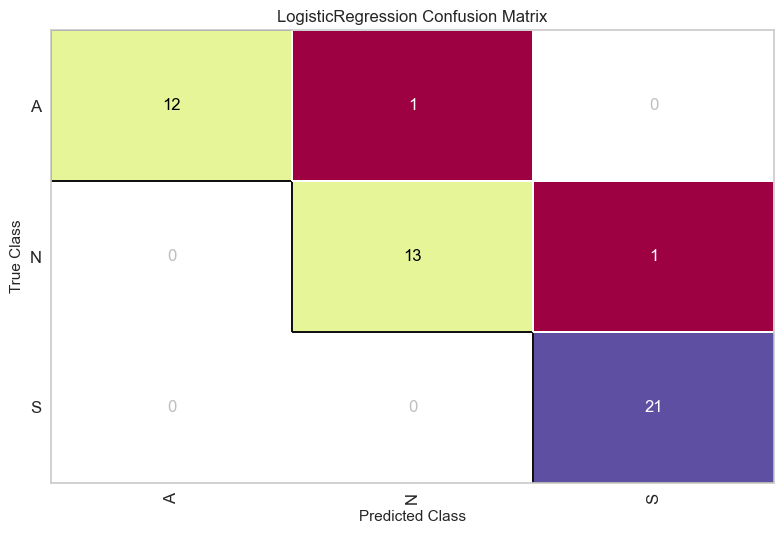

<Figure size 800x550 with 0 Axes>

              precision    recall  f1-score   support

         0.0     1.0000    0.9231    0.9600        13
         1.0     0.9286    0.9286    0.9286        14
         2.0     0.9545    1.0000    0.9767        21

    accuracy                         0.9583        48
   macro avg     0.9610    0.9505    0.9551        48
weighted avg     0.9593    0.9583    0.9582        48



In [59]:
from yellowbrick.classifier import confusion_matrix

visualizer = confusion_matrix(
    lr, x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'], cmap='Spectral'
)


visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)

plt.savefig('CM_LogisticRegression.png')
plt.tight_layout();
plt.show()



#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_lr, digits = 4))

 <font color=#C499F3 size=6>**Bagging Classifier**

In [60]:
from sklearn.ensemble import BaggingClassifier

B =  BaggingClassifier()
B.fit(x_train, y_train)

ypred_B=B.predict(x_test)

print('Score: %.2f' % B.score(x_test, y_test))

Score: 0.96


In [61]:
#Matriz de confusion para saber donde acierta y donde falla

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
confusion_matrix(y_test, ypred_B)

array([[12,  1,  0],
       [ 0, 13,  1],
       [ 0,  0, 21]], dtype=int64)

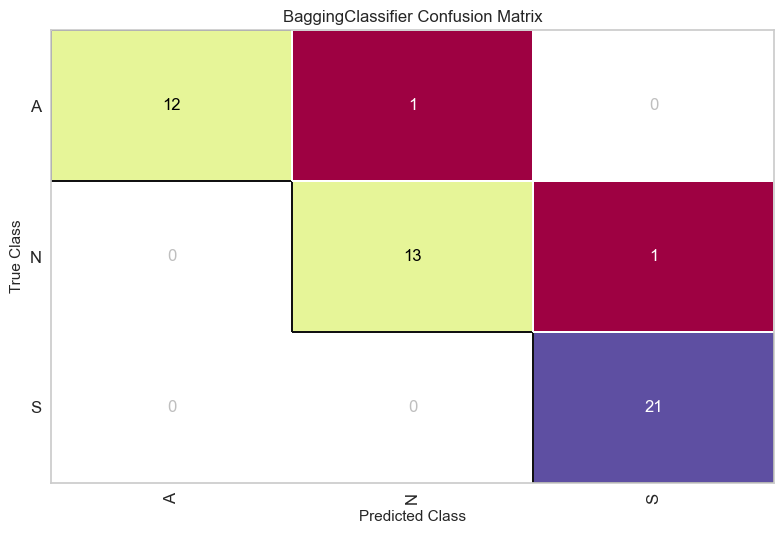

<Figure size 800x550 with 0 Axes>

              precision    recall  f1-score   support

         0.0     1.0000    0.9231    0.9600        13
         1.0     0.9286    0.9286    0.9286        14
         2.0     0.9545    1.0000    0.9767        21

    accuracy                         0.9583        48
   macro avg     0.9610    0.9505    0.9551        48
weighted avg     0.9593    0.9583    0.9582        48



<Figure size 800x550 with 0 Axes>

In [62]:
from yellowbrick.classifier import confusion_matrix

visualizer = confusion_matrix(
    B, x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'], cmap='Spectral'
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
plt.tight_layout();
plt.show()
plt.savefig('CM_BeggingClassifier.png')


#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_B, digits = 4))

 <font color=#C21292 size=6>**ExtraTrees Classifier**

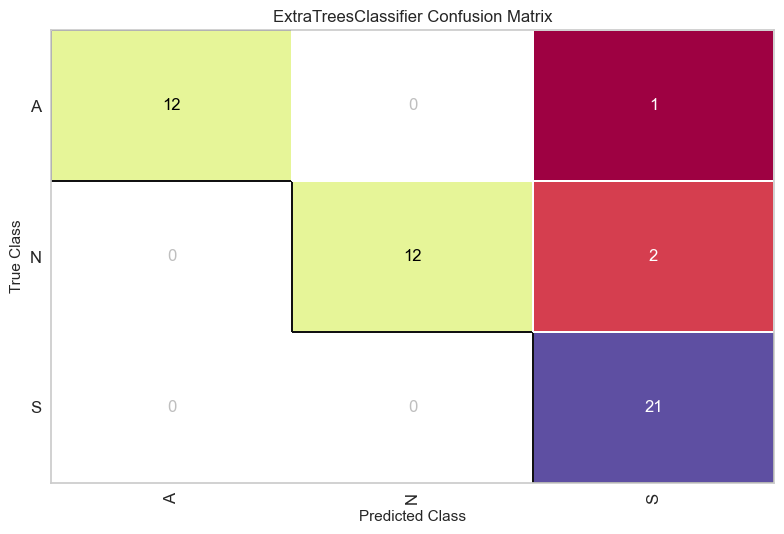

<Figure size 800x550 with 0 Axes>

              precision    recall  f1-score   support

         0.0     1.0000    0.9231    0.9600        13
         1.0     1.0000    0.8571    0.9231        14
         2.0     0.8750    1.0000    0.9333        21

    accuracy                         0.9375        48
   macro avg     0.9583    0.9267    0.9388        48
weighted avg     0.9453    0.9375    0.9376        48



<Figure size 800x550 with 0 Axes>

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

T = ExtraTreesClassifier(n_estimators=300)
T.fit(x_train, y_train)

ypred_T=T.predict(x_test)

visualizer = confusion_matrix(
    T, x_train, y_train, x_test, y_test,
    classes=['A', 'N', 'S'], cmap='Spectral'
)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
plt.tight_layout();
plt.show()
plt.savefig('CM_ExtraTrees.png')

#Generación de soporte

from sklearn import metrics
print(metrics.classification_report(y_test, ypred_T, digits = 4))

 <font color=#E188CC size=6>**Comparation of the different Models and Quantifiers**

In [64]:
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


models = [
    SVC(gamma='auto', C = 40, kernel = 'rbf', random_state=123), NuSVC(nu=0.1, gamma='auto'), LinearSVC(),
    SGDClassifier(max_iter=100, tol=1e-3), KNeighborsClassifier(),
    MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01, solver = 'lbfgs', max_iter =5000, random_state = 123),
   ExtraTreesClassifier(n_estimators=300),  BaggingClassifier(), 
    RandomForestClassifier(n_estimators=300), LogisticRegression(solver='liblinear'), XGBClassifier(random_state=200)
]


def score_model(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    
    model = Pipeline([('estimator', estimator)])

    # Instantiate the classification model and visualizer
    model.fit(X, y, **kwargs)

    expected  = y_test
    predicted = model.predict(x_test)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{}: {}".format(estimator.__class__.__name__, accuracy_score(expected, predicted)))

for model in models:
    score_model(x_train, y_train, model)

SVC: 1.0
NuSVC: 1.0


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC: 0.9791666666666666
SGDClassifier: 0.9375
KNeighborsClassifier: 0.8333333333333334
MLPClassifier: 0.8958333333333334
ExtraTreesClassifier: 0.9166666666666666
BaggingClassifier: 0.8541666666666666
RandomForestClassifier: 0.9583333333333334
LogisticRegression: 0.9583333333333334
XGBClassifier: 0.8958333333333334
